<a href="https://colab.research.google.com/github/abdulazeem/Computer_Vision_PyAdrian/blob/main/Connected%20Component%20Analysis/opencv_connected_components.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

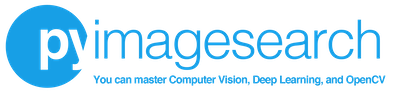

# OpenCV Connected Component Labeling and Analysis


### by [PyImageSearch.com](http://www.pyimagesearch.com)

## Welcome to **[PyImageSearch Plus](http://pyimg.co/plus)** Jupyter Notebooks!

This notebook is associated with the [OpenCV Connected Component Labeling and Analysis](https://www.pyimagesearch.com/2021/02/22/opencv-connected-component-labeling-and-analysis/) blog post published on 02-22-21.

Only the code for the blog post is here. Most codeblocks have a 1:1 relationship with what you find in the blog post with two exceptions: (1) Python classes are not separate files as they are typically organized with PyImageSearch projects, and (2) Command Line Argument parsing is replaced with an `args` dictionary that you can manipulate as needed.

We recommend that you execute (press ▶️) the code block-by-block, as-is, before adjusting parameters and `args` inputs. Once you've verified that the code is working, you are welcome to hack with it and learn from manipulating inputs, settings, and parameters. For more information on using Jupyter and Colab, please refer to these resources:

*   [Jupyter Notebook User Interface](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html#notebook-user-interface)
*   [Overview of Google Colaboratory Features](https://colab.research.google.com/notebooks/basic_features_overview.ipynb)

As a reminder, these PyImageSearch Plus Jupyter Notebooks are not for sharing; please refer to the **Copyright** directly below and **Code License Agreement** in the last cell of this notebook. 

Happy hacking!

*Adrian*

<hr>

***Copyright:*** *The contents of this Jupyter Notebook, unless otherwise indicated, are Copyright 2021 Adrian Rosebrock, PyimageSearch.com. All rights reserved. Content like this is made possible by the time invested by the authors. If you received this Jupyter Notebook and did not purchase it, please consider making future content possible joining PyImageSearch Plus at [http://pyimg.co/plus/](http://pyimg.co/plus) today.*

### Download the code zip file

In [1]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-connected-components/opencv-connected-components.zip
!unzip -qq opencv-connected-components.zip
%cd opencv-connected-components

--2021-04-21 08:19:24--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-connected-components/opencv-connected-components.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.176.81
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.176.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60417 (59K) [binary/octet-stream]
Saving to: ‘opencv-connected-components.zip’

opencv-connected-co 100%[===================>]  59.00K   360KB/s    in 0.2s    

2021-04-21 08:19:24 (360 KB/s) - ‘opencv-connected-components.zip’ saved [60417/60417]

/content/opencv-connected-components


## Blog Post Code

### Import Packages

In [2]:
# import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2

### Function to display images in Jupyter Notebooks and Google Colab

In [3]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### Implementing basic connected components with OpenCV

In [4]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True,
# 	help="path to input image")
# ap.add_argument("-c", "--connectivity", type=int, default=4,
# 	help="connectivity for connected component analysis")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "image": "license_plate.png",
    "connectivity": 4
}

In [20]:
# load the input image from disk, convert it to grayscale, and
# threshold it
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
thresh1 = cv2.threshold(gray, 0, 255,
	cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
thresh2 = cv2.threshold(gray, 0, 255,
	cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]

# Add Gaussian blur and then threshold

blur = cv2.GaussianBlur(gray,(5,5),0)

thresh3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]

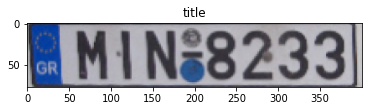

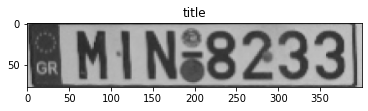

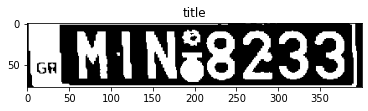

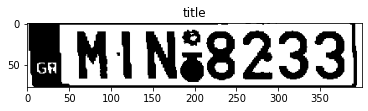

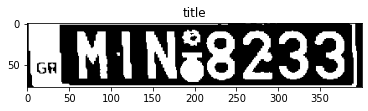

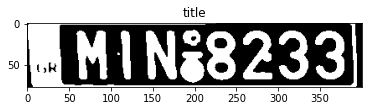

In [21]:
plt_imshow('title',image)
plt_imshow('title',gray)
plt_imshow('title',thresh)
plt_imshow('title',thresh1)
plt_imshow('title', thresh2)
plt_imshow('title', thresh3)

In [22]:
args["connectivity"]

4

In [23]:
# apply connected component analysis to the thresholded image
output = cv2.connectedComponentsWithStats(
	thresh, args["connectivity"], cv2.CV_32S)
(numLabels, labels, stats, centroids) = output

[INFO] examining component 1/17 (background)


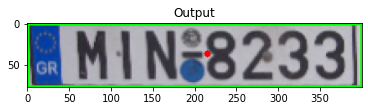

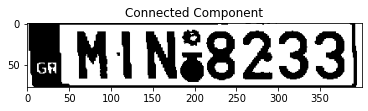

[INFO] examining component 2/17


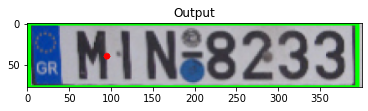

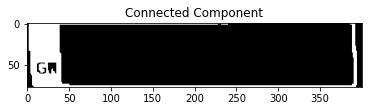

[INFO] examining component 3/17


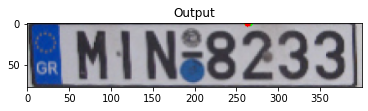

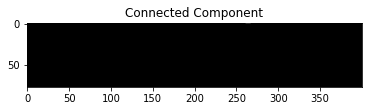

[INFO] examining component 4/17


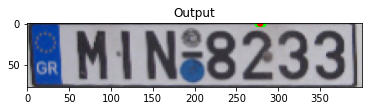

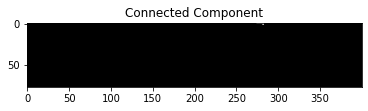

[INFO] examining component 5/17


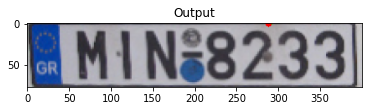

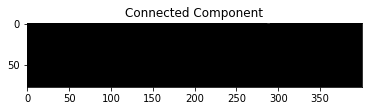

[INFO] examining component 6/17


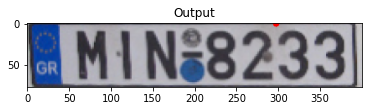

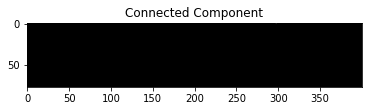

[INFO] examining component 7/17


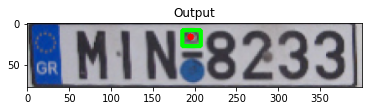

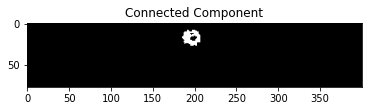

[INFO] examining component 8/17


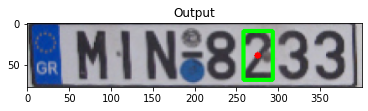

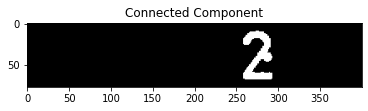

[INFO] examining component 9/17


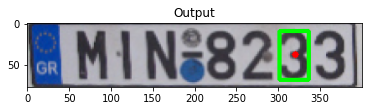

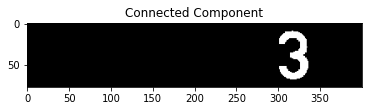

[INFO] examining component 10/17


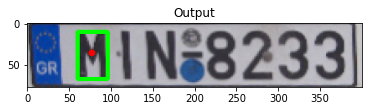

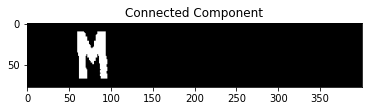

[INFO] examining component 11/17


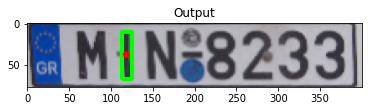

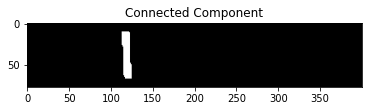

[INFO] examining component 12/17


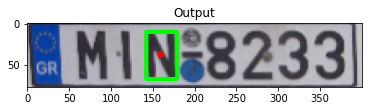

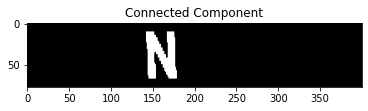

[INFO] examining component 13/17


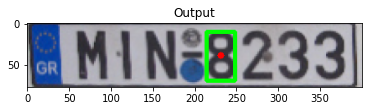

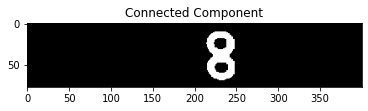

[INFO] examining component 14/17


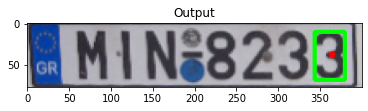

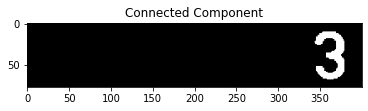

[INFO] examining component 15/17


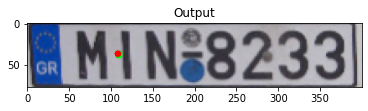

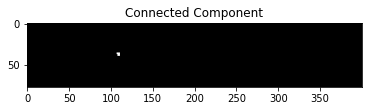

[INFO] examining component 16/17


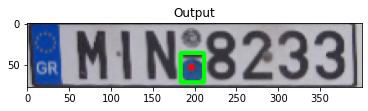

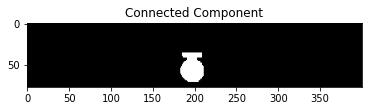

[INFO] examining component 17/17


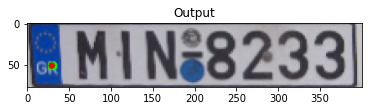

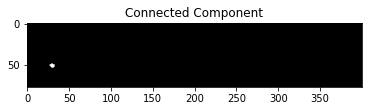

In [28]:
# loop over the number of unique connected component labels
for i in range(0, numLabels):
	# if this is the first component then we examining the
	# *background* (typically we would just ignore this
	# component in our loop)
	if i == 0:
		text = "examining component {}/{} (background)".format(
			i + 1, numLabels)

	# otherwise, we are examining an actual connected component
	else:
		text = "examining component {}/{}".format( i + 1, numLabels)

	# print a status message update for the current connected
	# component
	print("[INFO] {}".format(text))

	# extract the connected component statistics and centroid for
	# the current label
	x = stats[i, cv2.CC_STAT_LEFT]
	y = stats[i, cv2.CC_STAT_TOP]
	w = stats[i, cv2.CC_STAT_WIDTH]
	h = stats[i, cv2.CC_STAT_HEIGHT]
	area = stats[i, cv2.CC_STAT_AREA]
	(cX, cY) = centroids[i]

	# clone our original image (so we can draw on it) and then draw
	# a bounding box surrounding the connected component along with
	# a circle corresponding to the centroid
	output = image.copy()
	cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 3)
	cv2.circle(output, (int(cX), int(cY)), 4, (0, 0, 255), -1)

	# # construct a mask for the current connected component by
	# # finding a pixels in the labels array that have the current
	# # connected component ID
	componentMask = (labels == i).astype("uint8") * 255

	# show our output image and connected component mask
	plt_imshow("Output", output)
	plt_imshow("Connected Component", componentMask)

### How to filter connected components with OpenCV

In [ ]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True,
# 	help="path to input image")
# ap.add_argument("-c", "--connectivity", type=int, default=4,
# 	help="connectivity for connected component analysis")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "image": "license_plate.png",
    "connectivity": 4
}

In [33]:
# load the input image from disk, convert it to grayscale, and
# threshold it
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

# apply connected component analysis to the thresholded image
output = cv2.connectedComponentsWithStats(
	thresh, args["connectivity"], cv2.CV_32S)
(numLabels, labels, stats, centroids) = output

# initialize an output mask to store all characters parsed from
# the license plate
mask = np.zeros(gray.shape, dtype="uint8")

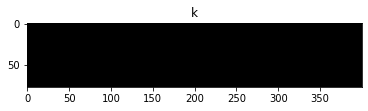

In [34]:
plt_imshow('k',mask)

[INFO] keeping connected component 7
[INFO] keeping connected component 8
[INFO] keeping connected component 9
[INFO] keeping connected component 10
[INFO] keeping connected component 11
[INFO] keeping connected component 12
[INFO] keeping connected component 13


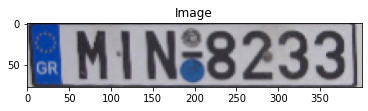

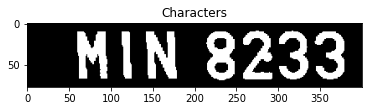

In [32]:
# loop over the number of unique connected component labels, skipping
# over the first label (as label zero is the background)
for i in range(1, numLabels):
	# extract the connected component statistics for the current
	# label
	x = stats[i, cv2.CC_STAT_LEFT]
	y = stats[i, cv2.CC_STAT_TOP]
	w = stats[i, cv2.CC_STAT_WIDTH]
	h = stats[i, cv2.CC_STAT_HEIGHT]
	area = stats[i, cv2.CC_STAT_AREA]

	# ensure the width, height, and area are all neither too small
	# nor too big
	keepWidth = w > 5 and w < 50
	keepHeight = h > 45 and h < 65
	keepArea = area > 500 and area < 1500

	# ensure the connected component we are examining passes all
	# three tests
	if all((keepWidth, keepHeight, keepArea)):
		# construct a mask for the current connected component and
		# then take the bitwise OR with the mask
		print("[INFO] keeping connected component {}".format(i))
		componentMask = (labels == i).astype("uint8") * 255
		mask = cv2.bitwise_or(mask, componentMask)

# show the original input image and the mask for the license plate
# characters
plt_imshow("Image", image)
plt_imshow("Characters", mask)

For a detailed walkthrough of the concepts and code, be sure to refer to the full tutorial, [*OpenCV Connected Component Labeling and Analysis*](https://www.pyimagesearch.com/2021/02/22/opencv-connected-component-labeling-and-analysis/) published on 02-22-21.

---



# Code License Agreement
```
Copyright (c) 2021 PyImageSearch.com

SIMPLE VERSION
Feel free to use this code for your own projects, whether they are
purely educational, for fun, or for profit. THE EXCEPTION BEING if
you are developing a course, book, or other educational product.
Under *NO CIRCUMSTANCE* may you use this code for your own paid
educational or self-promotional ventures without written consent
from Adrian Rosebrock and PyImageSearch.com.

LONGER, FORMAL VERSION
Permission is hereby granted, free of charge, to any person obtaining
a copy of this software and associated documentation files
(the "Software"), to deal in the Software without restriction,
including without limitation the rights to use, copy, modify, merge,
publish, distribute, sublicense, and/or sell copies of the Software,
and to permit persons to whom the Software is furnished to do so,
subject to the following conditions:
The above copyright notice and this permission notice shall be
included in all copies or substantial portions of the Software.
Notwithstanding the foregoing, you may not use, copy, modify, merge,
publish, distribute, sublicense, create a derivative work, and/or
sell copies of the Software in any work that is designed, intended,
or marketed for pedagogical or instructional purposes related to
programming, coding, application development, or information
technology. Permission for such use, copying, modification, and
merger, publication, distribution, sub-licensing, creation of
derivative works, or sale is expressly withheld.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND,
EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES
OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND
NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS
BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN
ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN
CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
```